In [8]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)

## Group 42 Project - Tennis Data

### Introduction

The Association of Tennis Professionals (ATP) tennis circuit is for the best male tennis players in the world. The players are ranked based on how many points they accumulate when competing in ATP level tournaments. The better they perform in each tournament (i.e. the more rounds they win), the more points they accumulate, and the higher the players are ranked. Additionally, for each round that a player wins, they win a certain amount of prize money. As such, the player who wins the tournament receives the most amount of points and prize money. There are different levels of tournaments within the ATP circuit and the more prestigious ones, such as the Grand Slams, allow players to earn more points and prize money. However, they are more difficult to enter as you must have a certain rank to play. In the ATP ranking, points are updated on a weekly basis, and they are disregarded after 1 year. Therefore, whoever is number 1 has accumulated the most current points by winning the most. Therefore, it can also be assumed that they have accumulated the most prize money. 

In this project we are trying to predict what a player’s prize money would be based on current ranking, points accumulated, and their best rank. We are trying to see how much money a player would be expected to make if they were a certain rank. 

To do so, we are using the dataset: player_stats. The dataset contains information about the current top 500 tennis players in the ATP. The most pertinent information from the dataset for our project would be current ranking, best rank, prize money, and their age. Some columns and rows are very sparse, as much information is missing. Currently, the players are not ranked in order, but that will be changed. 


### Data Analysis 

In [6]:
#Demonstrate that the dataset can be read from the web into R
tennis_data <- read_csv("player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
#Clean and wrangle your data into a tidy format
names(tennis_data)[names(tennis_data) == 'Prize Money'] <- 'prize_money'#renames Prize Money column to prize_money
tidy_tennis <- tennis_data |>
    select(Age:Plays,("Current Rank"):prize_money)|> #Removes columns with high proportions of NA 
    separate(col=Age,into=c("age","birth_date"),sep=" ")|> #Separates age and birth date into seperate columns
    separate(col=("Current Rank"),into=c("current_rank","points"),sep=" ")|> #Separates current rank and points into separate columns)
    separate(col=("Best Rank"),into=c("best_rank", "best_rank_date"),sep=" ")|> #Separates best rank and date of best rank into separate columns
    mutate(birth_date= gsub("[()]","",birth_date)) |> #Removes brackets
    mutate(points= gsub("[()]", "", points)) |> #Removes brackets
    mutate(best_rank_date=gsub("[()]","",best_rank_date))|> #Removes brackets
    mutate(birth_date=as_date(birth_date, format='%d-%m-%Y')) |> #Converts birth_date column to date objects
    mutate(best_rank_date=as_date(best_rank_date, format='%d-%m-%Y')) |> #Converts best_rank_date column to date objects
    mutate(age=as.numeric(age)) |> #Converts age column to numberic objects
    mutate(current_rank=as.numeric(current_rank)) |> #Converts current_rank column to numberic objects
    mutate(points=as.numeric(points)) |> #Converts points column to numberic objects
    mutate(best_rank=as.numeric(best_rank))|> #Converts best_rank column to numberic objects
    mutate(prize_money=gsub("[US$,]","",prize_money))|> #Removes some of the non-numeric aspects of prize_money data
    separate(col=prize_money,into=c("prize_money","x"),sep=". ") |> #removes the remaining non-numeric aspects of prize_money data
    select(age:prize_money) |> #removes unnecessary x column, which contained removed non-numeric aspects of prize-money data
    mutate(prize_money=as.numeric(prize_money))
tidy_tennis

Warning message:
“Expected 2 pieces. Additional pieces discarded in 20 rows [16, 96, 128, 142,
208, 212, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468,
497].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 397 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


age birth_date Country                   Plays        current_rank points
1   26  1993-04-25 Brazil                    Right-handed 378            97  
2   18  2001-12-22 United Kingdom            Left-handed  326           119  
3   32  1987-11-03 Slovakia                  Right-handed 178           280  
4   21  1998-05-29 Korea, Republic of        Right-handed 236           199  
5   27  1992-10-21 Australia                 Right-handed 183           273  
6   22  1997-02-11 Poland                    Right-handed  31          1398  
7   28  1991-11-18 United States             Right-handed 307           131  
8   21  1998-05-12 Taiwan, Province of China Right-handed 232           205  
9   25  1994-07-29 Uzbekistan                Right-handed 417            81  
10  20  1999-04-02 Finland                   Right-handed 104           534  
11  19  2000-08-08 Canada                    Right-handed  22          1701  
12  23  1996-02-11 Russian Federation        Right-handed   4          5960  
13  28  1991-11-28 Ecuador                   Right-handed 148           359  
14  23  1996-02-22 Germany                   Left-handed  431            74  
15  28  1991-03-17 Canada                    Right-handed 134           411  
16  31  1988-09-23 Argentina                 Right-handed 121           460  
17  24  1995-04-26 Spain                     NA           375            99  
18  22  1997-05-02 Australia                 Right-handed 133           411  
19  20  1999-08-31 Serbia                    Right-handed  54           959  
20  22  1997-10-28 United States             Right-handed  34          1335  
21  33  1986-04-12 Spain                     Right-handed 130           417  
22  32  1987-10-07 United States             Right-handed  45          1100  
23  30  1989-09-20 Slovakia                  Right-handed 105           528  
24  30  1989-08-30 Italy                     Right-handed 172           294  
25  30  1989-11-29 Sweden                    Right-handed 293           138  
26  22  1997-03-23 Italy                     Right-handed 339           115  
27  26  1993-09-14 Spain                     Right-handed 448            69  
28  30  1989-11-12 India                     Left-handed  123           442  
29  21  1998-02-19 Brazil                    Right-handed 388            93  
30  32  1987-05-24 Italy                     Right-handed  12          2310  
⋮   ⋮   ⋮          ⋮                         ⋮            ⋮            ⋮     
471 23  1997-01-12 Spain                     Right-handed 210           226  
472 24  1995-02-07 United States             NA           493            61  
473 28  1991-11-13 Germany                   Right-handed 167           302  
474 34  1985-06-17 Cyprus                    Right-handed 179           279  
475 26  1993-06-29 Brazil                    Right-handed 298           136  
476 21  1998-11-27 Italy                     NA           485            63  
477 25  1994-09-21 France                    NA           353           110  
478 24  1995-05-05 Italy                     Right-handed 289           140  
479 25  1994-08-24 France                    Right-handed 486            63  
480 18  2001-08-03 United States             Right-handed 360           107  
481 27  1992-10-27 Russian Federation        Right-handed 207           233  
482 23  1996-10-03 China                     Right-handed 365           105  
483 29  1990-10-16 United States             Right-handed 351           110  
484 26  1994-01-17 Belgium                   Right-handed 334           116  
485 22  1998-01-20 United States             Right-handed  50          1050  
486 32  1988-01-14 Belgium                   Left-handed  260           172  
487 23  1996-05-03 Japan                     Left-handed  429            75  
488 24  1995-09-27 Japan                     Left-handed   71           797  
489 24  1995-07-04 Canada                    Right-handed 103           534  
490 18  2001-08-08 Taiwan,

In [ ]:
#Using only training data, summarize the data in at least one table (this is exploratory data analysis).
tidy_tennis <- tidy_tennis |>
    select(age,birth_date, Country, current_rank, points, best_rank, best_rank_date, prize_money)
tennis_split <- initial_split(tidy_tennis, prop = 0.75, strata = prize_money)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)
tennis_list <- list(Column=c("age","birth_date","Country","current_rate","points","best_rank","best_rank_date","prize_money"),Approximate_Mean=c(26,"NA","NA",247,447,173,"NA",2111817),Mode=c(25,"NA","France","NA",73,78,"NA","NA"),Rows_with_Missing_Data=c(1,0,1,5,5,1,0,65))
tennis_summary <- data.frame(tennis_list)
tennis_summary

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


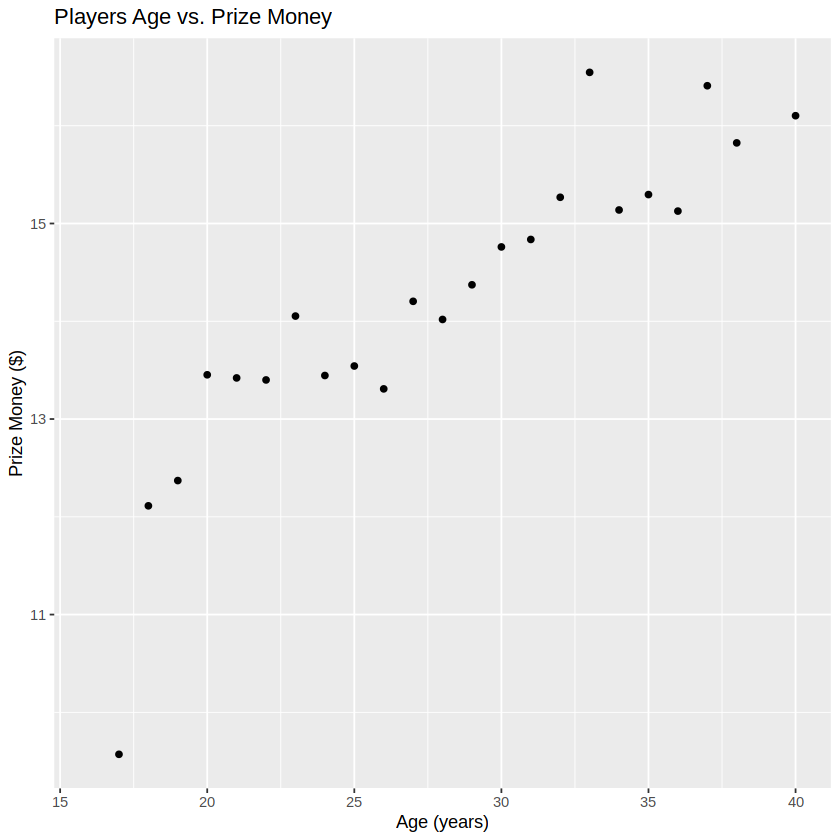

In [18]:
tennis_plot <- tidy_tennis |>
    group_by(age) |>
    summarise(prize_money = mean(prize_money, na.rm=TRUE)) |>
    ggplot(aes(x = age, y = log(prize_money))) + 
    geom_point() + 
    labs(x = "Age (years)", y = "Prize Money ($)") + 
    ggtitle("Players Age vs. Prize Money")

tennis_plot

### Method

Using the dataset, we will be performing a regression analysis. This form of analysis was chosen because we are trying to predict a numerical value. We will be using the columns: age, birth_date, current_rank, points, best_rank, best_rank_date, and prize_money. All other columns will be disregarded when performing regression as they do not aid our predictions. All other columns are valuable information as they all play a part in how much prize money a player will receive in the future. Using regression analysis, we will create a hypothetical ATP tennis player and predict how much prize money they will earn based on their current statistics. 

To visualize the results, we will be creating multiple scatter plots that we can use to predict a hypothetical player’s current prize money. Each graph would visualize how a certain variable (age, birth_date, current_rank, points, best_rank, best_rank_date, or prize_money) affects prize money amount (in dollars, most likely scaled to accommodate for the large range). In doing so, we are able to see which variable has the largest influence on prize money. 


### Expected Outcomes and Significance

By performing regression analysis, we are expecting to discover which variables have the largest influence on prize money. We are hypothesizing that factors age and current rank will impact prize money the most. Specifically, the lower the age and the higher the rank, the more prize money the player is expected to receive. 

These findings could potentially allow players to calculate their expected financial trajectory. In doing so, it allows them to assess their current situation and decide whether continuing to be a tennis professional is a worthy investment. The data also allows players to set goals for themselves. Additionally, these findings are useful for investors as they are able to analyze which player has the most financial potential. Overall, this data allows multiple parties to see how they are able to maximize their financial income. 

Through this analysis, there are many future questions that can be proposed. For example, we could use these statistics to analyze how much money an ATP tennis player is expected to make from endorsements based on these factors. We could also use this data to predict at what age a tennis player will retire based on these factors. 